In [107]:
import pandas as pd
import math
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

In [108]:
#filePath = 'data/arc2yeardata.xlsx'
filePath = '/Users/decolvin/Downloads/Freeborn Elec 060718.csv'
#data = pd.read_excel(filePath, header=0, index_col=0, parse_date=True)
data = pd.read_csv(filePath, header=0, index_col=0, parse_dates=True)
print(data.columns)

Index([u'Freeborn_Hall_MSB/Electricity_Demand'], dtype='object')


In [109]:
%load_ext autoreload
%autoreload 2

import sys
toolPath = r'/Users/decolvin/Box Sync/UCD_ECO_coding/mypy'
sys.path.append(toolPath)

import mnv
import matplotlib.pyplot as plt
print("Success!")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Success!


In [110]:
data.tail()

,Freeborn_Hall_MSB/Electricity_Demand
2018-06-07 03:00:00,67.523230
2018-06-07 04:00:00,39.359605
2018-06-07 05:00:00,37.108333
2018-06-07 06:00:00,43.894315
2018-06-07 07:00:00,54.509311


Q(75%): 58.11 Q(25%): 40.34
IQR value is 17.77
Ceiling adjusted by IQR - Now 111.40
0


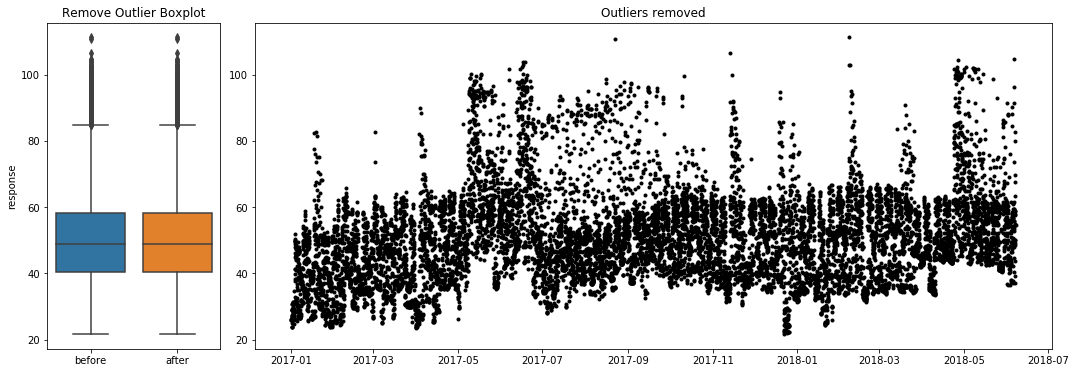

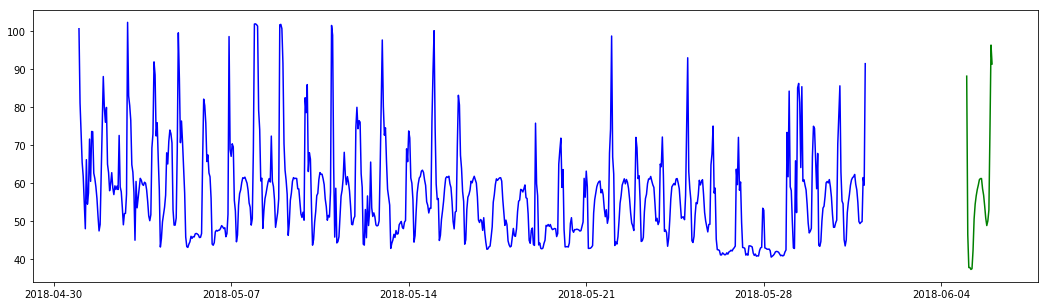

In [111]:
response = 'Freeborn_Hall_MSB/Electricity_Demand'

inputDict = {'IQRmult' : 3.0,
                 'IQR' : 'y',
                 'ceiling' : 1000000,
                 'floor' : 0,
                 'resampleRate' : 'H',
                 'verbosity' : 3,
                 'sliceType' : 'ranges', #half, middate, ranges
                 'midDate' : '2018-01-01', #only needed with sliceType : 'middate'
                 'dateRanges' : ['2018-05-01','2018-06-01','2018-06-05','2018-06-06'], #only needed with sliceType : 'ranges'
                 'OATname' : None,
                 'OATsource' : 'file'} #only needed with sliceType : 'ranges'}
data.rename(columns={response:"response"},inplace=True)

dc = mnv.data_handler(data["response"], inputDict)
dc.default_clean()

# Run this incase the y-range is FUBAR
#dc.outlier_plot(dc.modifiedData[dc.com]) 

fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(111)
ax.plot(dc.pre[dc.com],color='b')
ax.plot(dc.post[dc.com],color='g')
plt.show()

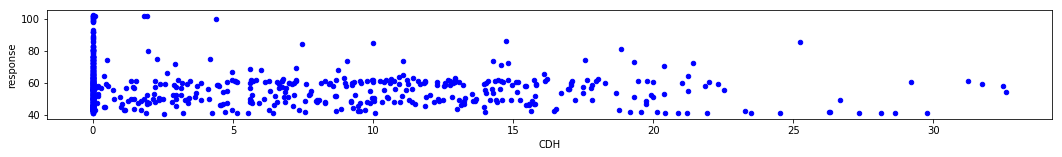

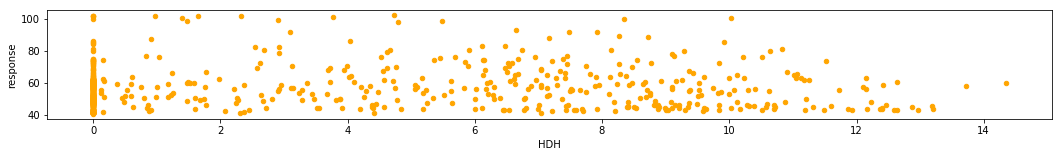

Response vs CDH = -0.12
Response vs HDH = 0.04
Response vs CDH2 = -0.10
Response vs HDH2 = -0.02


In [112]:
### Correlation
dc.pre.plot.scatter(x='CDH', y='response',figsize=(18,2), color='blue')
dc.pre.plot.scatter(x='HDH', y='response',figsize=(18,2), color='orange')
plt.show()
print "Response vs CDH = %.2f" %dc.pre.response.corr(dc.pre.CDH)
print "Response vs HDH = %.2f" %dc.pre.response.corr(dc.pre.HDH)
print "Response vs CDH2 = %.2f" %dc.pre.response.corr(dc.pre.CDH2)
print "Response vs HDH2 = %.2f" %dc.pre.response.corr(dc.pre.HDH2)

In [113]:
dc.pre.columns

Index([u'response', u'HDH', u'CDH', u'HDH2', u'CDH2', u'year', u'month', u'day', u'hour', u'minute', u'weekday', u'daytime', u'weekend', u'saturday', u'sunday'], dtype='object')

In [114]:
allmod = mnv.many_ols(dc.pre, dc.post, inputParams=['', 'C(month)',#])
                                                    'C(weekend)',#])
                                                    'C(hour)',])
                                                    #'C(daytime)'])

allmod.run_all_linear()
print(allmod.statsPool[0:3])
#allmod.plot_pool(2)

topParams = allmod.statsPool.iloc[0]['params']
print
print "Best Paramaters = %s" %topParams

        AIC       AR2      BIC        R2      mse                                 params                                                sum
26  3558.64  0.542399  3668.01   0.56551  72.6614             HDH + C(weekend) + C(hour)                              OLS Regression Res...
65  3558.64  0.542399  3668.01   0.56551  72.6614  HDH + C(month) + C(weekend) + C(hour)                              OLS Regression Res...
55  3560.16  0.541873  3673.73  0.565936   72.745      CDH2 + HDH + C(weekend) + C(hour)                              OLS Regression Res...

Best Paramaters = HDH + C(weekend) + C(hour)


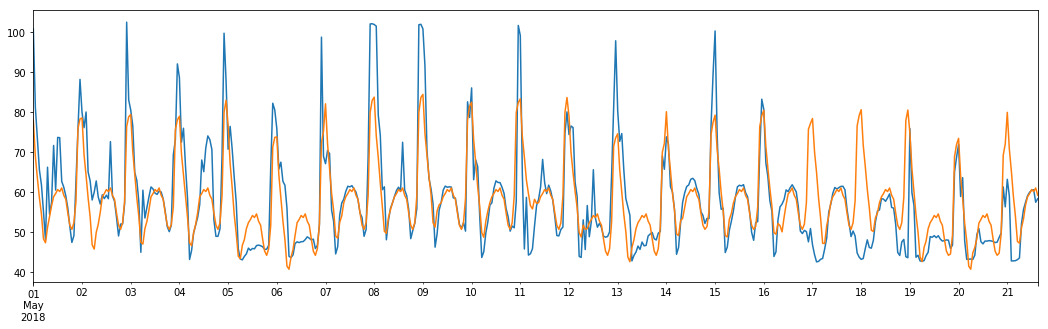

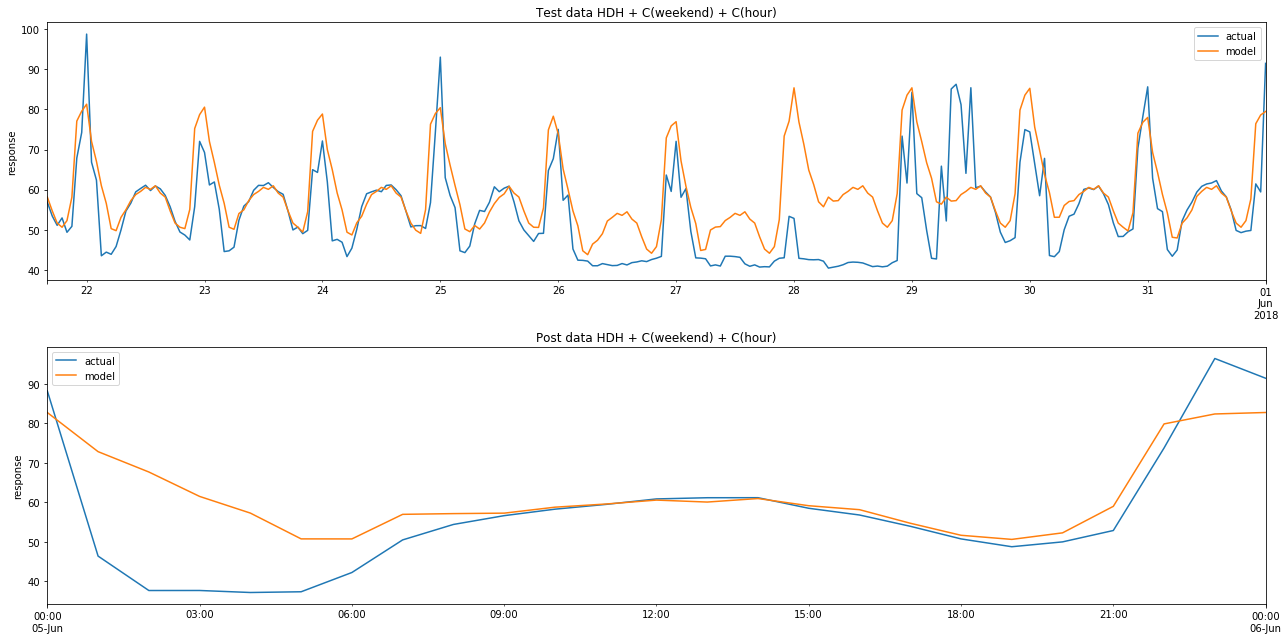

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     24.47
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           2.27e-69
Time:                        08:02:58   Log-Likelihood:                -1753.3
No. Observations:                 496   AIC:                             3559.
Df Residuals:                     470   BIC:                             3668.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          85.3743      2.207     38.681      0.000      81.037      89.711
C(weekend)[T.1]    -6.4801      0.847     -7.651      0.000      -8.144      -4.816
C(hour)[T.1]       -8.4957      2.637     -3.222      0.001     -13.677      -3.314
C(hour)[T.2]      -13.4036      2.651     -5.056      0.000     -18.613      -8.195
C(hour)[T.3]      -18.6616      2.671     -6.986      0.000     -23.911     -13.413
C(hour)[T.4]      -22.5385      2.706     -8.329      0.000     -27.856     -17.221
C(hour)[T.5]      -28.4040      2.724    -10.426      0.000     -33.757     -23.051
C(hour)[T.6]      -28.9928      2.733    -10.610      0.000     -34.363     -23.623
C(hour)[T.7]      -27.2347      2.644    -10.302      0.000     -32.430     -22.040
C(hour)[T.8]      -28.2291      2.654    -10.635      0.000     -33.445     -23.013
C(hour)[T.9]      -28.1108      2.778    -10.119      0.000     -33.570     -22.652
C(hour)[T.10]     -26.6023      2.843     -9.358      0.000     -32.188     -21.016
C(hour)[T.11]     -25.8070      2.854     -9.042      0.000     -31.416     -20.198
C(hour)[T.12]     -24.8103      2.862     -8.668      0.000     -30.434     -19.186
C(hour)[T.13]     -25.3068      2.867     -8.826      0.000     -30.941     -19.672
C(hour)[T.14]     -24.4164      2.867     -8.515      0.000     -30.051     -18.782
C(hour)[T.15]     -26.2339      2.867     -9.149      0.000     -31.868     -20.599
C(hour)[T.16]     -27.2330      2.897     -9.400      0.000     -32.926     -21.540
C(hour)[T.17]     -30.6619      2.897    -10.584      0.000     -36.355     -24.969
C(hour)[T.18]     -33.7079      2.897    -11.635      0.000     -39.401     -28.015
C(hour)[T.19]     -34.7505      2.897    -11.995      0.000     -40.443     -29.058
C(hour)[T.20]     -33.0964      2.872    -11.523      0.000     -38.740     -27.452
C(hour)[T.21]     -26.3875      2.788     -9.465      0.000     -31.866     -20.909
C(hour)[T.22]      -5.5415      2.710     -2.045      0.041     -10.867      -0.216
C(hour)[T.23]      -1.8257      2.675     -0.682      0.495      -7.083       3.431
HDH                -0.7449      0.190     -3.925      0.000      -1.118      -0.372
==============================================================================
Omnibus:                       88.243   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.611
Skew:                          -0.666   Prob(JB):                     1.27e-96
Kurtosis:                       7.426   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
params = topParams
mod = mnv.ols_model(dc.pre, dc.post, params)

plt.figure()
mod.train.response.plot(figsize=(18,5))
mod.trainCalc.plot(figsize=(18,5))

plt.figure()
mod.model_plot()

plt.show()
mod.Fit.summary()

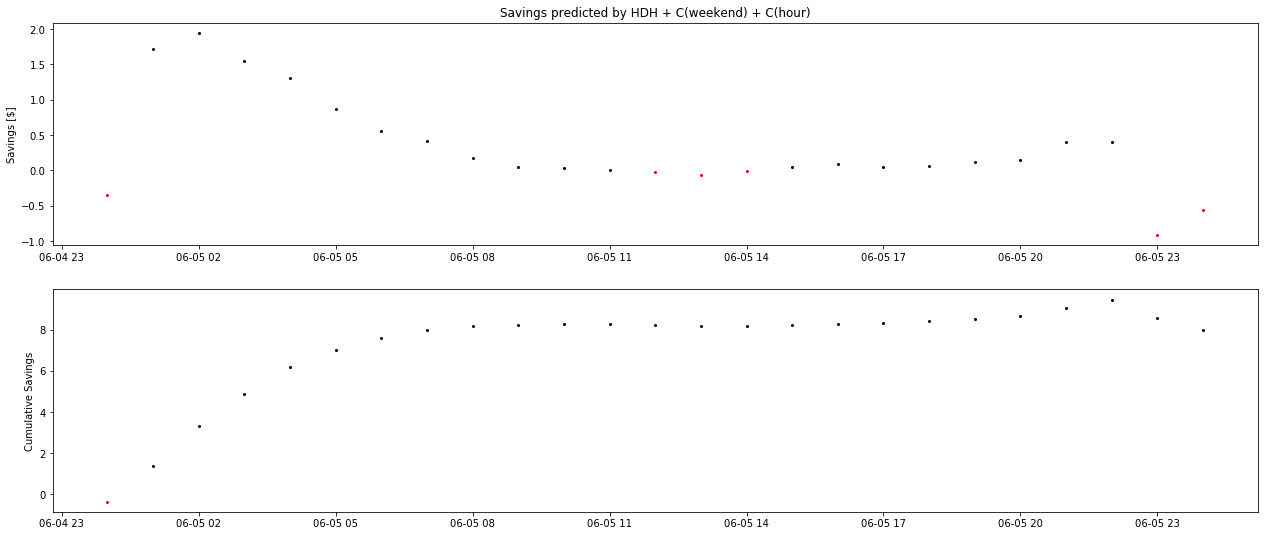

Total Savings over Post Period = $8
R-Squared = 0.54
CVRMSE = 0.15


In [116]:
rates = {'chw':0.047, 'steam':6, 'elec':0.065} #tonh,klb,and kWh prices for 2017
commodity = 'elec'

mod.savings_plot(yaxis='dollars', rate=rates[commodity])
print "Total Savings over Post Period = $%.0f" %(mod.postCumsum * rates[commodity])
print "R-Squared = %.2f" %mod.Fit.rsquared_adj
print "CVRMSE = %.2f" %(math.sqrt(mod.Fit.mse_resid) / dc.pre.response.mean())